<a name="top"></a>

$~~~~~~~~~~~$<img src="https://moodlesupd.script.univ-paris-diderot.fr/pluginfile.php/1/theme_foundation/frontpageslideimage1/1585262946/moodle_logo.png" width="350" />
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$
<img src="http://www.apc.univ-paris7.fr/APC_CS/sites/default/files/logo-apc.png" />

<br>

***

<center>
<h1>
Etude des différences entre les catalogues COSMOS et True Universe <br />
à l'aide des Self Organizing Maps
</h1> 
</center>

***

<br>

<center>

Stage de Master Physique 1 - 2020

Etudiant : Olivier ROTH

Encadrants : Alexandre BOUCAUD, Hubert BRETONNIERE

Rapporteur : Yann RASERA

Stage effectué au sein du laboratoire Astroparticules & Cosmologie sur une durée de 2 mois.

</center>

<br>



## Introduction

Ce stage prends part à la recherche pour développer des outils relatifs à la mission Euclid<sup>[[1]](#ref1)</sup>, un télescope spatial de l'ESA dont le lancement est prévu pour 2022, et destiné à percer les mystères de l’énergie noire et de la matière noire.
Pour y parvenir, le satellite réalisera un grand sondage de galaxies et tirera avantage de deux principaux effets physiques : 
* l'effet de lentille gravitationnelle faible (*weak lensing*), qui mesure la distorsion des galaxies lointaines causée par la présence de matière entre l'objet observé et l'observateur ;
* l'agglomération des galaxies (*galaxy clustering*) à différentes échelles, qui permet d'obtenir une image en 3D de l’évolution de la distribution de la matière noire et de la matière ordinaire (baryonique) dans le cosmos.

Le pipeline de traitement des données d'Euclid étant développé avant son lancement, il faut entraîner ses algorithmes sur des simulations les plus proches de ce qu'il verra afin de se rapprocher au maximum de son fonctionnement futur. 


Actuellement, le simulateur qui créé les images de galaxies, reposant sur des modèles paramétriques simples, n'est pas complètement satisfaisant et développe <font color='red'>(plutot et produit des images de galaxies)</font>des galaxies aux morphologies peu complexes.
\
C'est pourquoi plusieurs équipes de recherches sont actuellement en train de développer un algorithme de machine learning pour simuler des galaxies à la morphologie plus complexe, nécessitant donc un grand nombre de galaxies réelles pour son entrainement.
\
Or, pour l'instant, cet algorithme est entrainé sur COSMOS<sup>[[2]](#ref)</sup>, un catalogue de galaxies issue d'observations réelles <font color='red'>(je pense que des observations c est forcement reel, pas besoind de l ajouter)</font>.
Pour s'assurer de la similiarité entre les galaxies d'entrainement et les galaxies que les équipes du consortium Euclid veulent simuler (issues du catalogue True Universe), nous voulons trouver un moyen de comparer ces deux catalogues et les Self Organizing Maps, que nous appelerons SOMs dans toute cette étude, semblent être un moyen prometteur.


Les SOMs détectent des patterns dans des données multidimensionnelles et les représentent dans des espaces à dimensions beaucoup plus faibles, généralement en deux dimensions. \
La faible dimension de la carte résultante permet une présentation graphique des données qui peut être facilement interprétée par l'homme.
<font color='yellow'>Ce point nous a orienté vers cet outil (pouvant s'apparenter à une PCA) de visualisation assez pratique pour regarder plusieurs paramètres les uns par rapport aux autres en même temps.</font>


Grâce à ces cartes, dont l'idée a été développée par T. Kohonen<sup>[[3]](#ref)</sup> dans les années 80, l'objectif de cette étude serait
d'étudier les différences entre les catalogues COSMOS et True Universe.
Cette approche, assez novatrice malgré son âge, a été assez peu utilisé en astrophysique mais quelques papiers<sup>[[num ref]](#ref)</sup> font état de ses avantages et retracent les possibilités qu'offrent cet outil de visualisation.



<font color="red">ajouter l'annonce du plan </font>


## Sommaire


 ##  [Théorie sur les SOMs](#S3)
> ### [SOM, principe et algorithme](#S3_0_1) 
> ### [Utilisation de la carte : Hitmap](#S3_0_2)
> ### [Métriques](#S3_0_3)  


 ## [Première approche : classification des couleurs](#S3_1)
> ### [Hitmap](#S3_2)
> ### [Métriques](#S3_3)
> ### [Influence du sigma](#S3_4)
>> #### [Sur la topologie](#S3_4_1)
>> #### [Sur les poids](#S3_4_2)

 ##   [Application des SOMs aux catalogues COSMOS et True Universe](#S4)
> ### [Variables](#S4_2)
> ### [Dépeuplement des fortes magnitudes](#S4_4)
>> ### [Visualisation du "problème"](#S4_4_1)
>> ### [Avec tous les paramètres](#S4_4_2) <font color='red'>ca je le emttrai endoehors de la partie depeuplement des magnitudes, parce que l idee avec tout les params c est jstement d aller comparer des choses plus fines que seulement ce depeuplement. </font>


##  [Conclusion](#S5)

##  [Références](#ref)

##  [Annexe](#S6)

<a name="S3"></a>

<ins>
<h1> 
Théorie sur les SOMs
</h1>
</ins>




<a name="S3_0_1"></a>

<ins>
<h2> 
SOM, principe et algorithme
</h2>
</ins>




Le machine learning est un domaine d'étude de l'intelligence artificielle qui utilise des approches mathématiques et statistiques pour donner aux ordinateurs la capacité d'«apprendre» à partir de données, c'est-à-dire d'améliorer leurs performances dans la résolution de tâches sans être explicitement programmés pour chacune d'entre elles. 

La plupart des outils de machine learning, et notamment les SOMs, utilisent des réseaux de neurones pour cet apprentissage. Les neurones sont simplement des vecteurs, comportant un nombre de dimension égal au nombre de dimension des données d'entrées que l'on veut étudier.





</font>

Les cartes obtenues sont constituées de neurones, disposés selon la topologie choisie (par exemple rectangulaire ou hexagonale). Chaque neurone est associé à un vecteur "poids" ayant la même dimension que chaque vecteur d'entrée. 


Alors que les neurones de l'espace cartographique restent fixes, l'entraînement consiste à déplacer des vecteurs de poids du *codebook* vers les données d'entrée (réduisant une métrique de distance) sans altérer la topologie induite de l'espace cartographique.  Ainsi, le SOM décrit une mise en correspondance d'un espace d'entrée de dimension supérieure à un espace cartographique de dimension inférieure. Une fois formée, la carte peut classer un vecteur de l'espace d'entrée en trouvant le neurone avec le vecteur de poids le plus proche du vecteur de l'espace d'entrée.

Les poids des neurones sont initialisés soit à de petites valeurs aléatoires, soit échantillonnés de manière égale depuis le jeu de données de l'entrée. Avec cette dernière alternative, l'apprentissage est beaucoup plus rapide car les poids initiaux donnent déjà une bonne approximation des poids du SOM.

À l'issue de l'entrainement, nous obtenons ainsi une représentation à 2 dimensions conservant le maximum d'informations de l'espace de d'entrée.

<font color='red'> C'est pas encore tres clair je trouve. il faudrait que tu parte de l idee tres generale des soms (creation d'une representation 2D qui preserve les infos topologique, et que tu aille ensuite un peu plus dans le detail. Je dirais que tu as presque toutes les infos dans le texte que tu as ecrit pour le moment, ;ais que c ets un peu brouillon et surtout pas dans le bon sens.</font>




Concrètement, par étapes, l'entrainement du SOM s'effectue selon les étapes suivantes :

 1. On initialise les poids soit aléatoirement, soit depuis un échantillonnage de jeu de données

 2. On choisit un vecteur d'entrée au hasard parmis l'échantillon d'entrainement

 3. On parcourt chaque neurone de la carte 

 a. On calcule la distance euclidienne pour quantifier les similarités entre le vecteur d'entrée et le vecteur de poids du neurone

 b. On repère le neurone qui a la plus petite distance (ce neurone est appelé le *Best Matching Unit*, BMU)

 4. On met à jour les vecteurs de poids des neurones situés dans le voisinage du BMU (y compris le BMU lui-même) en les rapprochant du vecteur d'entrée grâce à la formule suivante : 
  $$W_v (i+1) = W_v(i)+f(i,u) \times (D(z)-W_v(i))$$ 
 Avec $W_v$ le vecteur de poids du neurone $v$, \
 $f=\tau \times exp{\left(-\frac{x^2}{2\pi \sigma_i^2} - \frac{y^2}{2\pi \sigma_i^2}\right)}$ une gaussienne centrée sur le BMU d'écart type $\sigma_i$ qui détermine la zone modifiée selon $\sigma$,

  à l'itération actelle i, $\tau$ le taux d'apprentissage, $u=(x,y)$ la position du BMU,
 $D$ un vecteur de données d'entrée d'indice $z$ aléatoire à l'étape $i$.


 5. On répète depuis l'étape 2 jusqu'à un nombre d'itération défini à l'avance

À noter que le $\sigma$ et le $\tau$ diminuent au cours de l'entrainement selon une loi en $1/x$ pour affiner l'apprentissage.

À l'issue de cet entrainement, il s'agit d'interpréter la carte obtenue. Plusieurs points seront à étudier : est-ce que des clusters se sont formés, est-ce que tous l'espace d'entrée est bien représenté, y a-t-il des corrélations entre les différentes couches de la carte, la carte est-elle lisse (est-ce que les frontières entre les clusters sont fortes ou est-ce que les transitions se font facilement), et autres...

\
Parmi les grandes questions autour des SOMs, les plus importantes, compliquées à la fois (et toujours à l'étude dans le monde de la recherche) sont : 
- quelle est la taille adéquate de la carte pour bien représenter les données ?
- quel $\sigma$ et $\tau$ initiaux doit-on prendre ?
- le réseau a-t-il convergé au terme de l'apprentissage ? 


\
Comme ces réseaux neuronaux ne font pas de distinction dans la façon dont ils forment des associations, en réduisant les dimensions des données d'étude, ils peuvent mettre en lumière de façon beaucoup plus claire des relations cachées entre les différentes dimensions. <font color='red'>font pas de distinction dans la façon dont ils forment des associations : je comprends pas ca...</font>



<a name="S3_0_2"></a>

<ins>
<h2> 
Utilisation de la carte : Hitmap
</h2>
</ins>


Une fois le réseau entrainé, nous pouvons l'utiliser pour classer un nouveau jeu de données.
En effet, les poids obtenus à l'issue de l'entrainement vont déterminer l'emplacement de ces nouvelles données en attribuant à chaque élément une place sur la carte en fonction de son BMU.
Ce procédé permet de donner à des données un aspect visuel plus facile à saisir qu'un tableau de statistiques à travers une *hitmap*. 


Le principe de la hitmap repose sur l'activation des neurones entrainés d'un *codebook* par un nouveau jeu de données. 
Chaque élément du nouveau jeu de données va interragir avec la carte et l'emplacement de son BMU sur la *hitmap* se verra attribuer un *hit* (il va prendre +1). <font color='red'>interagir je trouve ca un peu mysterieux. dit qu on refait comme dans le ntrainement, c est a dire comparer le vecteur avec toutes les cellules, et trouver le BMU, sauf qu ensuite on adapte pas les poids. Et que ce BMU voit incrementer sa valeur de 1 (plut que "prendre +1", on est pas au UNO :p) </font>
Finalement, chaque neurone aura été activé un certain nombre de fois et la *hitmap* permettra de visualiser ce nombre.




<a name="S3_0_3"></a>

<ins>
<h2> 
Métriques
</h2>
</ins>


 Afin de s'assurer que ces modèles sont effectivement représentatifs des données sous-jacentes, il est essentiel d'évaluer la qualité des cartes obtenues.

 Pour cela, on regarde l'évolution de certains paramètres <font color='red'>Je n aurais pas dis parametres, on al impression que tu apres d hyper parametre du reseau la. PLutot genre metrique, ou autre</font> : la *quantization error*, calculée comme la distance moyenne entre chaque échantillon d'entrée et l'unité qui lui correspond le mieux, la *topological error*, calculée comme la distance entre les deux premiers BMU de chaque échantillon d'entrée, et la valeur moyenne de la distance map. 
 
Formule de la *quantization error* : 
$$\overline{(\lvert x-BMU \rvert)}$$

Formule de l'erreur topographique : 
$$\overline{(\lvert BMU_1(x)-BMU_2(x) \rvert)}$$

Avec $x$ chaque vecteur d'entrée et BMU son *Best Matching Unit* correspondant.




<a name="S3_1"></a>

<ins>
<h1> 
Première approche du SOM
</h1>
</ins>



Nous commencerons par étudier les SOMs sur un terrain familier : la classification de couleurs.
En effet, plutôt que de se plonger directement dans l'analyse de catalogues de données astrophysiques, les couleurs permettent d'appréhender le concept des SOMs avec un résultat déjà connu à l'avance et une interprétation des résultats plus facile et sans ambiguïtée. 
Afin de saisir toutes les subtilités des SOMs, cette prise en main est nécessaire car l'outil d'analyse qu'est le SOM est complexe et en marge des outils habituellement utilisés par la communauté astrophysique.


Dans le machine learning, un des aspects important pour obtenir de bon résultats est l'uniformisation des jeux de données d'entrainement.
Nous avons donc créé pour cet exemple un jeu de données uniforme et  normalisé de 40 000 couleurs d'égales intensités. 
Chaque couleur étant représentée par un vecteur de trois valeurs entre 0 et 1 correspondant aux trois couleurs primaires rouge, vert et bleu, système dit RGB.
\
Le $\sigma$ est initialisé à 20, soit $1/5$ de la taille de la carte car, comme nous le verrons plus tard, c'est un bon compromis pour obtenir un résultat satisfaisant.
Le $\tau$ est quant à lui initialisé à 1 et nous entrainons sur 1000 itérations pour une carte de taille 100 pixels par 100 pixels. <font color='red'>Si ce que tu appelles "iteration et une "epoch" de machine learning, dit le. (une epoch = entrainer une fois sur l integralute du training set. Pour comprednre que l algo apprends en visualsiant plein de fois toutes les datas)</font>


À l'issue de l'entrainement, nous obtiendrons une carte de dimension $(100,100,3)$ représentant tout le spectre de couleurs de l'entrainement.
Nous nous attendons à ce que les couleurs soient classées puisque le SOM va essayer de minimiser les distances euclidiennes entre chaque vecteurs (=couleur) en trouvant à chaque fois le BMU. Sachant que deux vecteurs avec une distance euclidienne faible ont une teinte proche. Si les paramètres initiaux sont en adéquation avec la taille de la carte alors les couleurs seront séparées de façon assez lisse.

À noter que de part l'initialisation aléatoire et l'apprentissage qui, à chaque itération, prend un vecteur au hasard, chaque entrainement amène à un résultat différent ce qui explique que les couleurs ne se trouvent pas au même endroit selon les entrainements. Ce qui importe, c'est qu'à paramètres initiaux identiques, on retrouve un taux de classification et une topologie à peu près identique.


Tout au long de ce projet, nous avons utilisé le langage de programmation python ainsi que la bibliothèque MiniSom<sup>[[num ref]](#ref)</sup>.

Dans un soucis de réaliser un projet *open source*, accessible et compréhensible par le plus grand nombre, nous avons mis à disposition cette étude sur la platforme d'hébergement [GitHub](https://github.com).
Tout le document est exécutable et des [cellules interactives](#interactive_cell) sont incluses pour mieux apprécier le concept de SOM.

<font color="red">Afin que les cellules de ce rapport interacif soit executables (sous reserve d'avoir installe le dossier github (voir les premieres lignes du README), .....</font>
Installation de la bibliothèque MiniSom et chargement du fichier de définitions créé pour exécuter les cellules :

<a name="fig1"></a>

In [ ]:
!pip install minisom
from Main_definitions import*

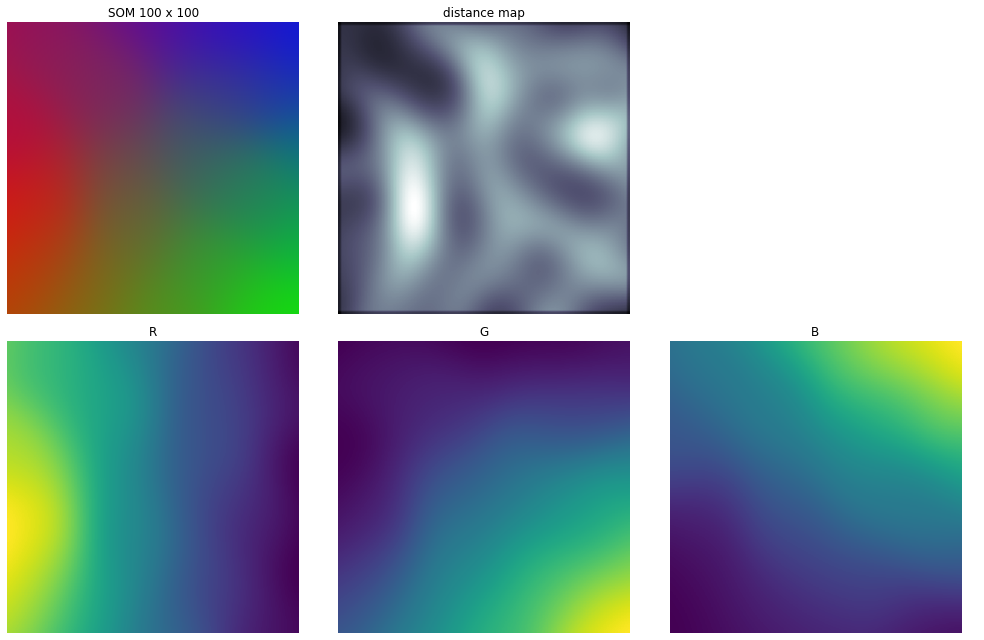

In [ ]:
sigma = 20
learning_rate = 1

som, weights = train_som(data_color, sigma, learning_rate, 1000, size=(100,100))
PlotSOMs(som)

<center>

Figure 1 : En haut à gauche la visualisation du SOM de 100x100 neurones en topologie rectangulaire. En bas les poids de chacune des trois couleurs, qui correspondent bien à l'image du SOM et sur lesquels on peut distinguer un gradient d'intensité. En haut au milieu, on retrouve la <i>distance map</i> qui prend des valeurs plus fortes sur les zones où la distance euclidienne sur le spectre entre les couleurs est la plus élevée.
</center>

À l'issue de l'entrainement les couleurs sont classées comme on peut le voir sur le graphique en haut à gauche de la [Figure 1](#fig1).

Les poids de chaque couleur, les trois graphiques en bas, sont bien dissociés et chaque couleur est formée d'un seul cluster.
Ces clusters se retrouvent sur le codebook dans les couleurs primaires. Les mélanges de couleurs comme de rouge et de bleu par exemple, du violet donc, se situent quant à eux aux frontière des clusters.


La *distance map* aussi appelée "U-matrix" nous permet de voir les limites entre les couleurs. Si deux couleurs proches dans le spectre se trouvent à côté alors leur distance sera faible et le pixel représentant cette distance sur la distance map sera foncé.
Elle est la traduction de la distance euclidienne entre chaque pixels, c'est pourquoi cette distance est plus faible sur les bords (et encore plus sur les coins) qui possèdent moins de pixels voisins.

On peut également faire un entrainement avec une topologie hexagonale (voir [Figure A_1](#A_1)). le résultat est censé être meilleur puisque chaque neurone possède 6 voisins directs au lieu de 4 dans une topologie rectangulaire, donnant une flexibilitée plus grande.

Les couleurs étant assez facile à classer, que ce soit en topologie rectangulaire ou hexagonale, le résultat est assez bon. Chaque couleur ne forme qu'un seul cluster, toujours éloigné au maximum des autres et les liaisons entre couleurs sont lisses.


Le SOM, en partant d'un jeu de données 3D comportant des relations à priori non triviale pour une machine, arrive à créer une représentation 2D facilement visualisable et classée d'une façon qui fait sens physiquement.


<a name="S3_2"></a>

<ins>
<h2> 
Hitmap
</h2>
</ins>





Nous regardons où "tombe" un jeu de données de 10 000 couleurs majoritairement bleues sur la carte en [Figure 1](#fig1). 
Chaque élément du jeu de données est la somme des trois couleurs primaires tirées sur des gaussiennes centrées en 0.3 pour le rouge et le vert et en 0.8 pour le bleu. Les écarts types de chacune de ces gaussiennes sont assez faibles pour que le jeu de données final soit centré sur un bleu peu intense.


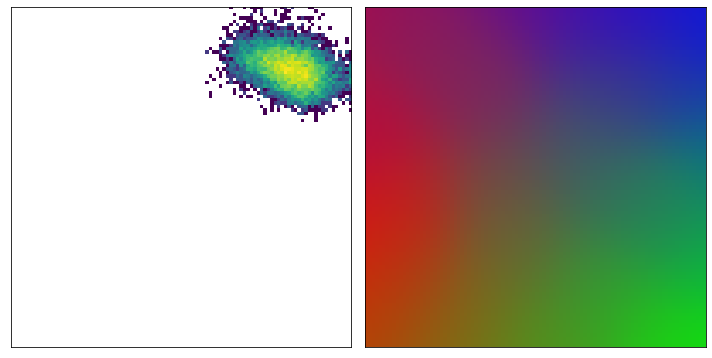

In [ ]:
Hitmap(som, data_blue(), compare=weights, hit_count=False, figsize=(10,8))

<center>

Figure 2 : Hitmap (gauche), activation de la carte rectangulaire en réponse à un jeu de données bleu. À droite on a remis la carte à l'issue de l'entrainement.
</center>

On voit que le jeu de données majoritairement bleu tombe bien la où le bleu est réparti sur la carte.\
Puisqu'on a pris un bleu léger, un peu de rouge et de vert, les points de la heatmap ne sont pas à l'extrémité du bleu du SOM.



Ce concept de hitmap se révèlera fort utile lors de l'application des SOMs aux catalogues de galaxies. En effet, il permettra de révéler les zones de l'espace paramétrique du catalogue d'entrainement qui ne sont pas peuplées par le catalogue de test, révélant ainsi les différences entre les populations d'objet, ainsi que de quantifier la densité de population de chaque zone de l'espace paramétrique.


<font color='red'>On en avait pas encvore parle, mais je pense que c ets bien que tu ajoutes une phrase disant que ces couleurs de tests n ont jamais ete vues par le reseau, et donc qu il a bien "appris" a classer des couleurs, memes celles qu'il n'as jamais vu</font>

<a name="S3_3"></a>

<ins>
<h2> 
Métriques
</h2>
</ins>

Afin de visualiser les différentes métriques résultantes d'un entrainement avec un jeu de données de couleurs, nous avons apporté des modifications à la bibliothèque MiniSom dont l'utilisation n'est pas programmée pour une étude complète des paramètres.

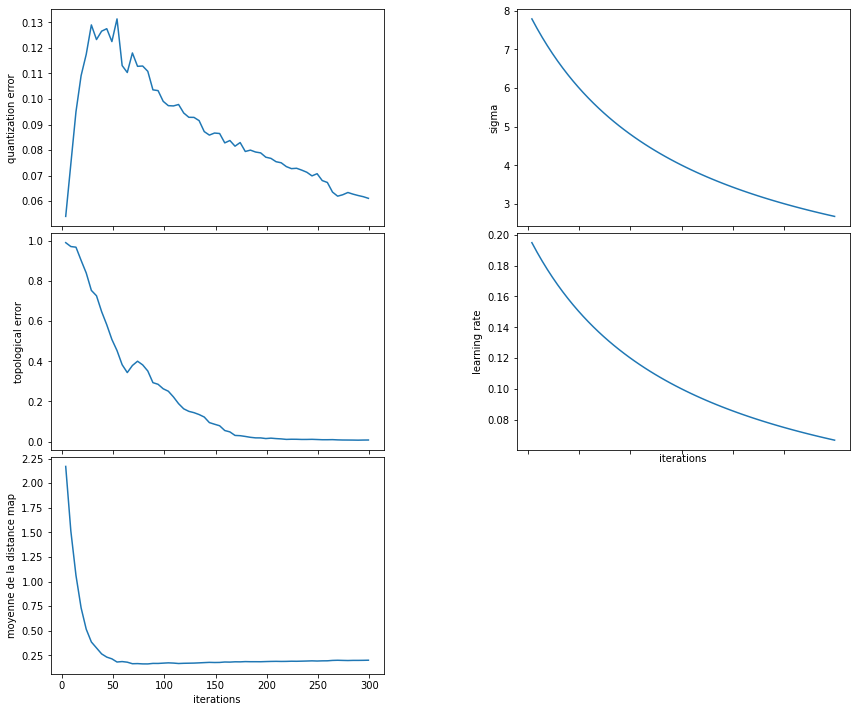

In [ ]:
plot_error(dict_vars)

<center>

Figure 3 : À gauche, de haut en bas, la *quantization error*, la *topological error*, ainsi que la moyenne de la *distance map*. À droite, le sigma et le taux d'apprentissage.
</center>

Au cours de l'entrainement, nous pouvons voir que toutes les métriques diminuent. Le $\sigma$ ainsi que le taux d'apprentissage $\tau$ diminuent par définition pour affiner l'apprentissage, et ces deux paramètres influent sur l'évolution des métriques. \
La *quantization error* diminue, cela signifie que le réseau apprend de plus en plus à classer les couleurs au fils de l'entrainement. \
L'erreur topographique (traduisant l'éloignement des clusters de couleurs identiques) diminue elle aussi. 
Une carte avec une forte erreur topographique ne permettra pas la formation d'un seul cluster pour chaque paramètre (qui est un critère de réussite de l'entrainement) et sera donc à éviter. \
Finalement, nous pouvons voir l'évolution de la moyenne de la *distance map*. Elle se stabilise au bout de quelques itérations du fait de la réduction du sigma : les changements sont si petits que la *distance map* n'évolue plus beaucoup. 

Pour tout entrainement, il n'est pas trivial de déterminer quelle métrique est la plus adéquate. Et malheureusement, comme nous le verrons, il existe un *trade off* entre les erreurs topographiques et de *quantization* en fonction des paramètres du SOM.



<a name="S3_4"></a>

<ins>
<h2> 
Influence du sigma
</h2>
</ins>

<a name="S3_4_1"></a>

<ins>
<h3> 
Sur la topologie
</h3>
</ins>




Comme nous l'avons vu précédemment, le $\sigma_0$ est un paramètre qui détermine la zone de modification des poids. Il est donc important de bien le définir pour que l'entrainement n'agisse pas sur des zones trop grandes trop petites.

<a name="fig4"></a>

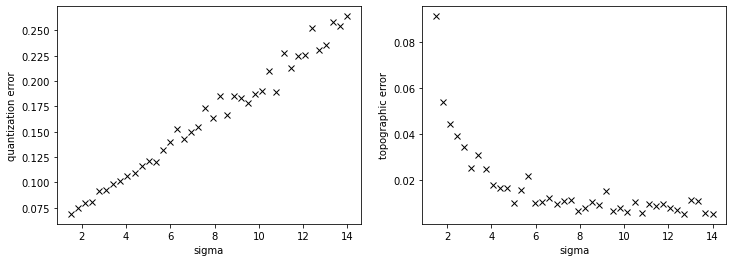

In [ ]:
nb_sigma=40
weights_multi, q_error, t_error, sigma_multi  = multi_sigma_train(nb_sigma, dat_color())
multi_sigma_plot(weights_multi, q_error, t_error, sigma_multi, choice='errors', idx=[0,18,-1])

<center>

Figure 4 : *Quantization* et *topographic error* finales pour différents $\sigma_0$ entre 2 et 14, et pour une carte de taille 30 par 30.
</center>

<a name="fig5"></a>

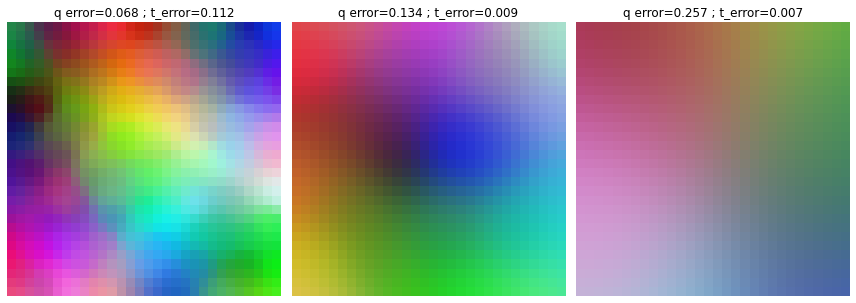

In [ ]:
multi_sigma_plot(weights_multi, q_error, t_error, sigma_multi, choice='sigmas', idx=[0,int(nb_sigma/2),-1])

<center>

Figure 5 : SOM de taille 30 par 30 entrainé avec $\sigma_0=1.5$ à gauche, $\sigma_0=5,5$ au milieu et $\sigma_0=14$ à droite.
</center>


Sur la [Figure 4](#fig4), nous pouvons voir les erreurs de quanfication et topograpique finales en fonction de différents $\sigma_0$ pour de nombreux entrainements.


L'erreur topographique qui traduit le regroupement des mêmes couleurs en un seul cluster diminue avec le $\sigma_0$. Cela se voit bien grâce à la [Figure 5](#fig5), puisqu'à très petit sigma les couleurs ne sont pas regroupées et l'erreur est donc forte, alors qu'à très grand sigma les couleurs ne forment qu'un seul cluster et l'erreur est faible.
\
La quantization error quant à elle, évolue de façon inverse : elle augmente avec le $\sigma_0$. En effet, cette erreur transcrit la présence des couleurs : si toutes les couleurs sont représentées alors l'erreur sera faible comme pour le graphique de gauche de la [Figure 5](#fig5) et inversement. <font color='red'>Je pense qu'elle ne traduit pas uniquement ca. C est une chose dont on s est rendu compte assez tard, c est pas evident. Tu peux mettre qu'en plus de la definition que. t as deja donne (distance entre les donnees et le codebook, ell epermet en effet de tracer cet effet de representation de toutes les couleurs ou non</font>

La [Figure 5](#fig5) nous permettent de mieux appréhender ce concept de sigma. A gauche, avec un $\sigma_0$ trop petit, les zones modifiées sont trop petites dès le début de l'entrainement et les clusters de même couleurs se forment donc à des endroits différents de la carte. 
A droite à l'inverse, avec un $\sigma_0$ trop grand, la carte est trop homogénéisée et on ne distingue plus les couleurs entre elles.
Au milieu, avec un $\sigma_0$ raisonnable, les couleurs sont plutôt regroupées et les frontières entre elles sont assez lisses.



Il s'agit donc, pour chaque carte, de lui attribuer un $\sigma_0$ adapté à sa taille pour obtenir des résultats satisfaisant ainsi qu'un bon compromis entre les erreurs topographique et de *quantization*.


<a name="S3_4_2"></a>

<ins>
<h3> 
Sur les poids
</h3>
</ins>



Afin de visualiser l'influence du $\sigma$ sur les poids, et donc sur l'entrainement, nous avons besoin de créer un jeu de données uniforme. \ <font color='red'>C etait deja le cas avant non ? On a l impression que tu fait un truc uniforme juste pour ce test mais que c etait pas le cas avant</font>
On tire des couleurs selon la distribution de dirichlet pour obtenir un jeu de données dont la somme de chaque couleur fait 1 et de manière uniforme. 


Ensuite nous entrainons un réseau avec un $\sigma_0$ égal à 5 soit $1/4$ de la taille de la carte pour obtenir une topologie acceptable.

<a name="fig6"></a>

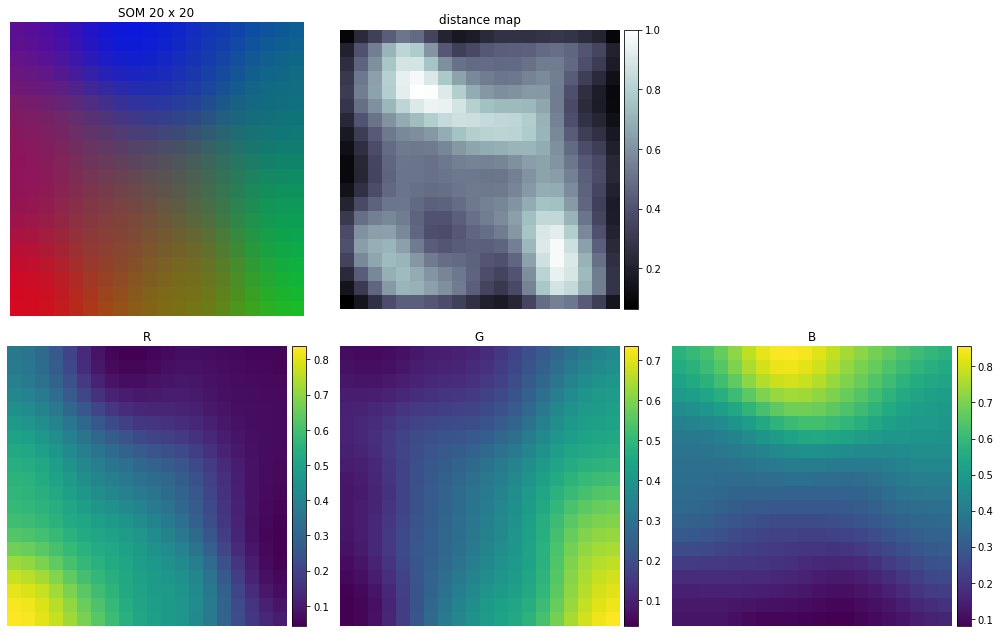

In [ ]:
color_norm = dat_color_norm()

sigma = 5
learning_rate = 2

som, weights = train_som(color_norm, sigma, learning_rate, 1000, size=(20,20))
PlotSOMs(som, colorbars=True)

<center>

Figure 6 : SOM de taille 20 par 20, les échelles de valeurs des poids sont présentes à côté de chaque graphique.
</center>


Nous constatons ici, grâce aux *colorbars* de la [Figure 6](#fig6), que les poids des couleurs n'atteignent pas les valeurs extrêmes. En effet, il manque les valeurs proches de 0 et de 1 qui correspondent aux couleurs les plus pures.


<a name="fig7"></a>

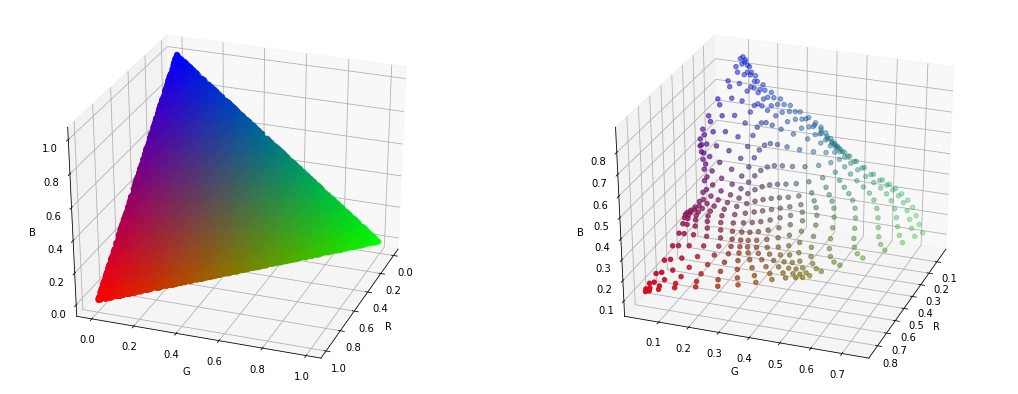

In [ ]:
weights_3D(color_norm, weights)

<center>

<center>

Figure 7 : À gauche : Visualisation de la répartition des données d'entrainement, tirés de manière uniforme et avec une intensité égale dans l'espace des couleurs à 3D.
À droite : Poids à l'issue de l'entrainement.
</center>


Sur le graphique de gauche de la [Figure 7](#fig7), les couleurs couvrent bien l'espace à 3 dimensions dont chaque axe représente une couleur primaire. Les couleurs les plus pures se retrouvent plus isolées dans les coins et les mélanges possédant beaucoup de couleurs voisines sont plutôt au milieu. 

Sur le graphique de droite de la [Figure 7](#fig7), nous pouvons voir que les couleurs les plus pures placées aux extrémités manques. Il y a aussi eu des modifications dans l'intensité de la plupart des couleurs (cela se ressent pas l'effet de vague sur la surface). <font color='red'>Si tu parles de ca, tu peux t attendre a des questions auxquelles il sera dur de repondre...</font>


Si nous faisons tomber le jeu de données ayant servi à l'entrainement sur la [carte précédemment obtenue](#fig6) nous obtenons la carte suivante, à gauche :

<a name="fig8"></a>

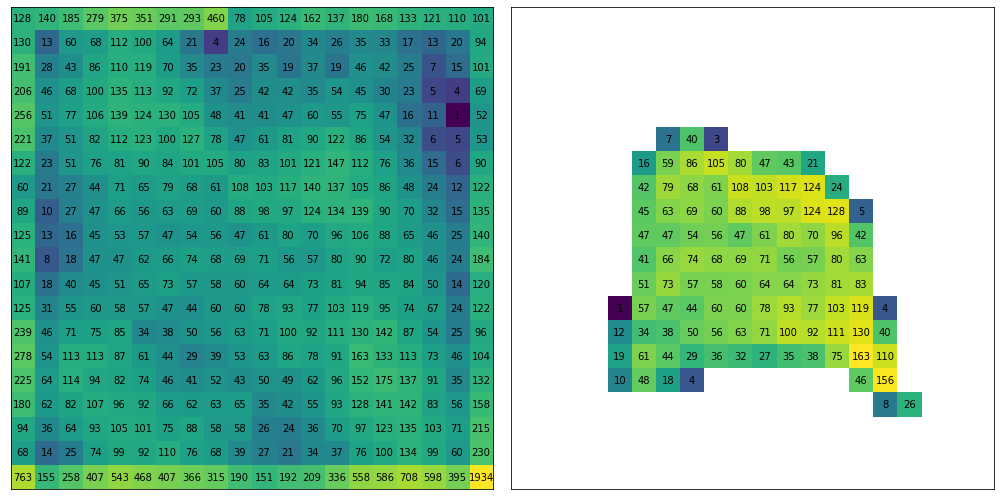

In [ ]:
new_colors_uniform = cut_extrem(color_norm, inf=0.2, sup=0.8)
activ_new = som.activation_response(new_colors_uniform)
Hitmap(som, color_norm, compare=activ_new, hit_count_compare=True, normed_compare=True)

<center>

Figure 8 : À gauche : Hitmap du jeu de donnée d'entrainement. À droite : Hitmap du jeu de donnée d'entrainement sans les couleurs pures.
</center>


Nous constatons qu'une bonne partie des couleurs tombent sur les bords ce qui pourrait signifier une sous représentation de certaines couleurs dans les poids entrainés. 

À l'issue de l'entrainement, les couleurs les plus pures sont aux bords de la carte, or comme nous l'avons vu avec la [carte des poids](#fig6), ces couleurs dites pures ne le sont pas complètement. Puisque nous avons une sous représentation des couleurs vraiment pures dans le SOM entrainé, elles iront toutes dans les BMU correspondant aux couleurs les plus pures possibles trouvées par le SOM, à savoir ceux des bords.


Avec la visualisation des poids de la [Figure 7](#fig7) nous avons constaté que les couleurs pures n'étaient pas présentes à l'issue de l'entrainement. 
Nous faisons donc la même manipulation que pour le graphique de gauche de la [Figure 8](#fig8) mais en retirant les couleurs extrêmes du jeu de données et nous obtenons le graphique de droite. \
Ici il n'y a plus aucun effet de bords. Donc l'entrainement, selon le $\sigma_0$ fini par "éliminer" certaines couleurs et celles qui sont éliminées en premier sont toujours les pures puisque ce sont celles qui ont le moins de couleurs voisines. <font color='red'>Je ne suis pas sur que ce soit si evident. Tu peux etre plus prudent et dire que c est une des interpretations possible qu on voudrqit verifier par la suite </font>




En prenant un $\sigma_0$ plus petit, avec le même jeu de données et une carte de la même taille, nous obtenons la *hitmap* suivante (gauche) :

<a name="fig9"></a>

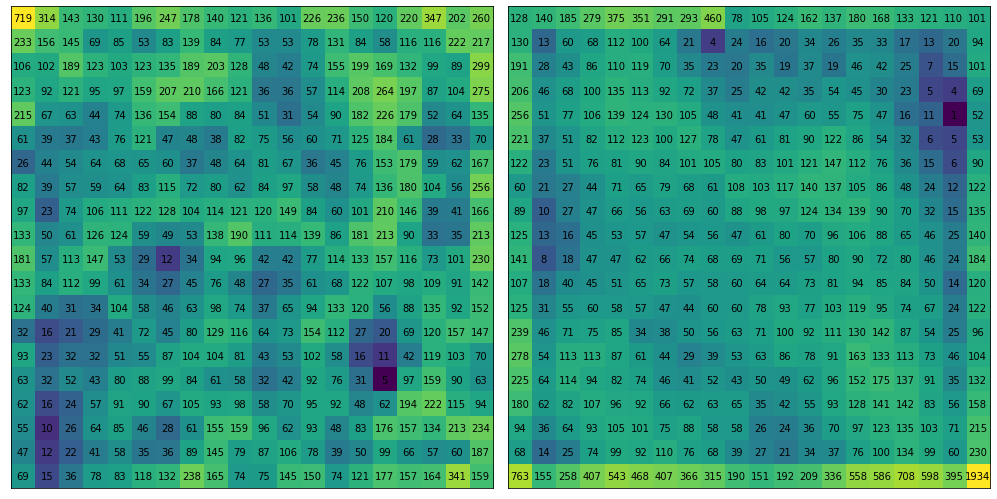

In [ ]:
sigma = 2

som2, weights = train_som(color_norm, sigma, 2, 2000, size=(20,20))

act_som1 = som.activation_response(color_norm)
Hitmap(som2, color_norm, compare=act_som1, hit_count_compare=True, normed_compare=True)

<center>

Figure 9 : À gauche : *hitmap* du jeu de donnée d'entrainement avec $\sigma_0=2$. À droite : *hitmap* obtenue précédemment, avec $\sigma_0=5$.
</center>


Un petit $\sigma_0$ affecte moins le jeu de données de base et nous avons donc une meilleures représentation de l'ensemble des couleurs.


Les effets de bords sont beaucoup moins présents sur le graphique de gauche de la [Figure 9](#fig9) et les couleurs sont presques toutes représentées (faible quantization error ,commme nous l'avons vu [auparavant](#S3_4_1) dans la section influence du sigma sur la topologie, pour les faibles $\sigma_0$). Mais le faible $\sigma_0$ rend la topologie plus maladroite et la carte est ainsi moins uniforme.


Le $\sigma_0$ a une influence non négligeable sur les poids et donc sur l'entrainement et les utilisations des cartes obtenues.
Il est donc essentiel de bien le choisir en fonction de la taille de la carte. À noter que l'uniformisation des jeux de données est aussi essentielle pour que l'entrainement se passe le mieux possible.
<font color='red'>Tu peux aussi ajouer que la hitmap est plus homogene avec un sigma 0 plus grand. </font>

<a name="S4"></a>

<ins>
<h1> 
Application des SOMs aux catalogues COSMOS et True Universe
</h1>
</ins>



Les données du catalogue [COSMOS](http://cosmos.astro.caltech.edu/page/hst) sont tirées d'une partie du ciel observée par le téléscope Hubble, grâce aux instruments ACS (*advanced Camera for Survey*) et WFC (*Wide Field Channel*). Plusieurs filtres existent sur ces instruments, mais le catalogue que nous utiliserons est celui de l’obersvation avec le filtre F814W, qui constitue le plus grand champ que Hubble a couvert sans coupure. \
Pour plus d'information sur l'obtention de ce catalogue, voir [A. M. Koekemoer et al 2007](https://ui.adsabs.harvard.edu/abs/2007ApJS..172..196K/abstract). 
Nous utilisons seulement un échantillon d'environ $80000$ galaxies en coupant celles de trop faible intensité (magnitude $<25,2$). Le catalogue peut être téléchargé sur diverses plateformes, notamment en suivant ce [lien](https://galsim-developers.github.io/GalSim/_build/html/real_gal.html).


\

Le second catalogue, utilisé pour tester la pipeline de traitement de données d'Euclid est le catalogue True Universe. Il est issue de simulations cosmologiques complexes de l’équipe SIM du consortium Euclid. \
Afin de créer un catalogue le plus proche de l'Univers qu’observera Euclid, un modèle semi analytique $\lambda CDM$, joint à une simulation à N corps est mis en oeuvre pour approcher les distributions des halos de matière noire avec comme objectifs principaux d'approcher la vraie distribution des fonctions de luminosité, de couleurs de tailles, formes et groupement de galaxies. \
Nous utiliserons $5$ champs simulés de True Universe, soit plus de $1,5$ millions de galaxies. N’étant pas limité par les caractéristiques d’un instrument, ses limites (notamment en magnitude), sont bien plus élevées que celles de COSMOS. <font color='red'> Peut etre a reformuler, limites elevees ont peut croire que c est d avantage limitee que la utre du coup </font>

Il est cependant difficile de comparer à l’avance les deux catalogues ; si l'on s’attend à ce que True Universe soit plus complet par rapport à COSMOS car moins limité, il est cependant dépendant de modèles, et peut donc peut-être manquer de galaxies irréguliere et "anormales". D’où l'intérêt de trouver des méthodes de comparaison puissante de catalogues.

<figure>
<center>
<img src="https://i.ibb.co/HqXsLyB/GxCOSMOS.png" alt="GxCOSMOS" border="0">
</center>
</figure>


<center>

Figure 10 : Galaxies du catalogue COSMOS, indice de Sersic en abscisse variant de gauche à droite entre 0 et 6 et ellipticité en ordonnée variant de bas en haut entre 0 et 1. 
</center>

Il existe un très grand nombre de paramètres pour décrire une galaxie. Dans notre étude, nous nous limiterons à quatres paramètres simples présent dans nos deux catalogues de morphologie, qui tracent donc la distribution des étoiles dans la galaxies : la magnitude apparente $m$, le rayon effectif $r_e$, l’ellipticite $e$, et l’indice de Sersic $n$.

- La magnitude apparente est une mesure de l’intensité lumineuse observée d’un objet. Elle depend donc à la fois de la luminosite intrinseque de l’objet, $L$, mais aussi de la distance $d$ entre l’objet et l’observateur :
$$ m = -2.5\rm{log}_{10}\left(\dfrac{L}{4\pi d^2}\right) + C $$
L’utilisation du log vient du fait que l’oeil humain a une réponse logarithmique aux luminosités. La présence du signe moins indique que plus un objet et lumineux, plus sa magnitude est faible. Pour exemple, la magnitude apparente du soleil est de $-26,7$, celle de la lune, $-12,6$, et celle de Proxima du Centaure, $11,05$. On estime la limite observable de l’oeil humain vers $7.5$.

- Le rayon effectif ou rayon de demi-lumière (half light radius) d’une galaxie est le rayon dans lequel $50\%$ de la luminosite de la galaxie est contenue. À noter que dans nos catalogues, les rayons sont donnés en pixel ou en arcseconde. Il s’agit donc d’un rayon apparent et non du rayon intrinsèque de la galaxie. Plus la galaxie est loin, plus son rayon sera petit. La transformation en rayon physique est possible, mais requiert une bonne mesure du redshift.

- L’ellipticité d’une galaxie est définie comme le rapport de ses demis axes, à savoir
$$ e = 1-\dfrac{b}{a} $$
avec $a$ le demi grand-axe et $b$ le demis petit-axe. Comme souvent en astrophysique, nous préférerons à l’ellipticité son oppose $q$ :
$$ q=1-e =  \dfrac{b}{a}$$
À noter donc que plus $q$ est grand, plus l’objet est sphérique, et inversement.

- Enfin, le paramètre le plus complexe, à savoir l’indice de Sersic $n$. Cet indice permet de décrire la décroissance de la luminosité d’une galaxie en fonction de la distance au centre. Il intervient dans le profil de Sersic, modèle simple mais abondamment utilisé en astrophysique pour décrire le profil d’intensité $I$ des sources :
$$ I(r) = I_e\ \rm{exp}^{-b_n\left(\left(\dfrac{r}{r_e}\right)^{1/n}-1\right)} $$
avec $I_e=I(r_e)$, et $b_n$ une constante dépendant de $n$. On voit donc que plus $n$ est grand, plus la lumière décroit vite en s'éloignant du centre, et inversement. On peut donc s’en servir par exemple pour tenter de séparer les galaxies dites elliptiques ($n>2$) des galaxies spirales ($n<2$).

Tout ces paramètre étant présent dans les deux catalogues, nous pouvons donc faire une première comparaison simple (et incomplète) des deux catalogues, grâce aux distributions marginales des 4 paramètres.




Chargement des catalogues : 

In [ ]:
folder = "datas"

# COSMOS
data_cs_ex = load_cat(folder+"/real_galaxy_catalog_25.2_fits.fits", cat_name='CS')

# True Universe fields
data_tu_i = []
for i in range(5):
    path_TU_i = folder+"/TU_created%s.fits"%str(i)
    data_tu_i.append(load_cat(path_TU_i, cat_name='TU'))
TU_fuse = mergeDict(data_tu_i)

data_cs_, data_tu_ = delete_issues(data_cs_ex, TU_fuse)

<a name="S4_2"></a>

<ins>
<h2> 
Variables
</h2>
</ins>



Nous avons représenté ci-dessous les variables utilisées, présentes dans les deux catalogues : 

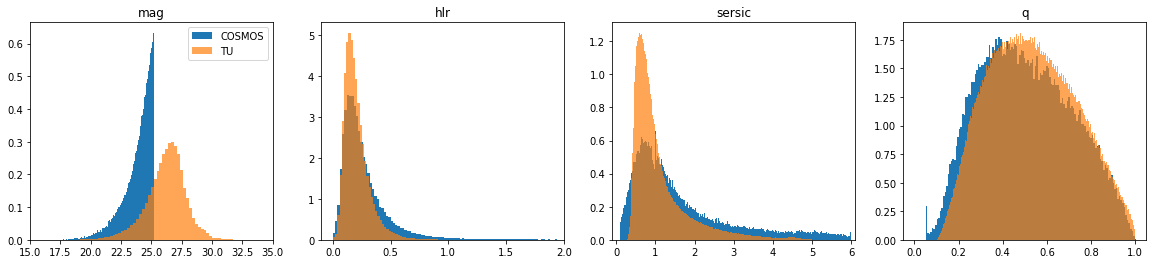

In [ ]:
compare_CS_TU(data_cs_, data_tu_, norm=False)
data_cs, data_tu_fuse = rescale_cats(data_cs_, data_tu_)

<center>

Figure 14 : Comparaison des magnitudes, rayons effectifs, indice de Sersic et q pour entre les deux catalogues.
</center>

Nous observons que le catalogue COSMOS, tiré d'observations, possède une magnitude limite à $25,2$ . Cette forte différence entre les catalogues sera étudiée plus en détail dans les sections suivantes.

Pour ce qui est des autres variables, les distributions ont des plages de valeurs identiques et ne possèdent pas de différences majeures.

Les catalogues possèdent tout de même un très faible nombre de galaxies dont les caractéristiques sont absurdes et inexploitables du fait d'erreurs d'instrumentation ou de bugs de simulation, c'est pourquoi les distributions ont été retravaillées avant de les étudier. 
Bien évidemment, il a aussi fallu faire concorder les unités.


<a name="S4_4"></a>

<ins>
<h2> 
Dépeuplement des fortes magnitudes
</h2>
</ins>



Nous venons de voir que le catalogue COSMOS possédait une magnitude limite de $25,2$. On espère retrouver ici ce manque de galaxies à forte magnitude à travers un dépeuplement de certaines zones de la heatmap.

Nous entrainerons d'abord le réseau avec seulement 2 variables, pour obtenir une classification bien plus simple et plus lisible. Nous verrons après ce que cela donnera pour les quatre paramètres en même temps.

<a name="S4_4_1"></a>

<ins>
<h3> 
Visualisation du "problème" <font color='red'> Je suis pas sur que ce soit bien de mettre des guillemets dans un titre comme ca. 
</h3>
</ins>


Nous entrainons donc le réseau avec le catalogue True Universe, censé représenter tous les cas de figure présents dans l'univers, en ne prenant que la magnitude et le rayon effectif.

Bien que la magnitude et le rayon présents dans ces deux catalogues soient des valeurs apparentes et non intrinsèques aux galaxies, des corrélations entre les paramètres sont tout de mêmes attendues puisque les objets les plus lumineux sont souvent plus grands. <font color='red'>Non, justement, puisque c est. apparent on s attend au double effet : effet apparent (plus loin = plus faible et plus petit, et le ffet physique de plus lumineux = plus massif et plus grand. Tu oeux citer ca The size distribution of galaxies in the Sloan Digital Sky Survey
Shiyin Shen. </font>


<a name="fig15"></a>

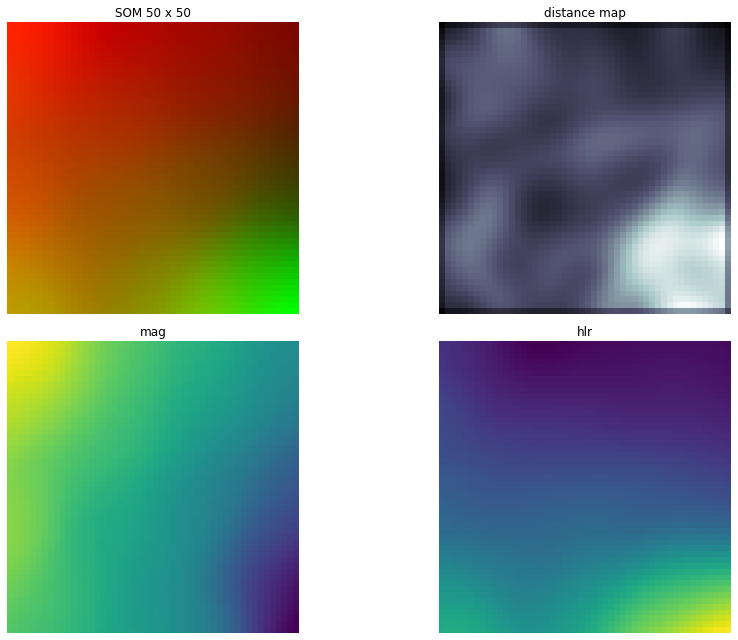

In [ ]:
choice_tu = np.array([data_tu_fuse["mag"],data_tu_fuse['hlr']]).T
choice_cs = np.array([data_cs["mag"],data_cs['hlr']]).T

sigma = 9
learning_rate = 1

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, size=(50,50))
PlotSOMs(som_tu, ["mag","hlr"], rescale_weigths=True)

<center>

Figure 15 : SOM entrainé avec True Universe, comprenant la magnitude et le rayon effectif.
</center>

La carte obtenue en haut à gauche de la [Figure 15](#fig15) traduit bien la séparation entre les deux paramètres. Les fortes magnitudes se placent en haut à gauche et les forts rayons effectifs en bas à droite. On rappellera que les résultats sont différents à chaque entrainement et que la place des pics d'intensités varie donc à chaque fois. Ce qui importe est l'agencement des paramètres entre eux et la séparation créée, peu importe l'endroit où elle se trouve.

Chaque poids associé à chaque neurone permet d'identifier un type de galaxie particulier.

Avec les graphiques des poids (en bas de la figure), nous observons une corrélation directe entre les deux paramètres.
Ce qui est cohérent puisqu'il existe des relations connues qui disent que les objets les plus brillants sont souvent plus massifs et que les objets plus massifs sont souvent plus grands.


Cette corrélation permet au SOM de parfaitement séparer les paramètres et nous octroie la possibilité d'analyser pleinement le graphique suivant :

<a name="fig16"></a>

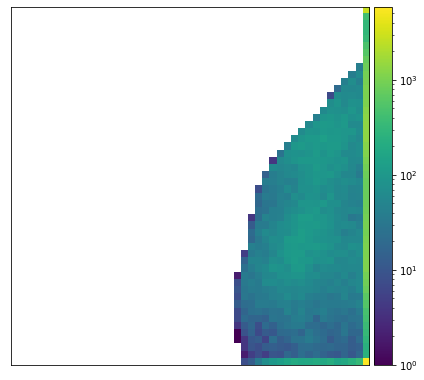

In [ ]:
Hitmap(som_tu, choice_cs, hit_count=False, colorbars=True, figsize=(6,6))

<center>

Figure 16 : Hitmap, activation du réseau entrainé sur True Universe par COSMOS.
</center>

Ici nous avons fait tomber le catalogue COSMOS dans la [carte entrainée](#fig15) sur True Universe et nous observons clairement que la zone à forte magnitude (coin supérieur gauche) est évitée. Cela semble signifier que le catalogue COSMOS ne possède pas de galaxies à très forte magnitude.

Pour s'assurer que le résultat précédent n'est pas le fruit d'un autre biais caché, nous faisons tomber sur le SOM entrainé des parties de True Universe : une avec les magnitudes supérieures à $25,2$ et l'autre inférieure à cette limite. Si les parties concordent avec le résultat précédent alors il sera validé puisqu'il ne peut pas y avoir de biais entre un catalogue et lui même. <font color='red'>Je usis pas sur de comprendre "ne peux pas avoir de biais avec lui meme>

<a name="fig17"></a>

In [ ]:
cut_mag_sup, activ_inf = mag_sup_inf(som_tu, data_cs, data_tu_fuse)

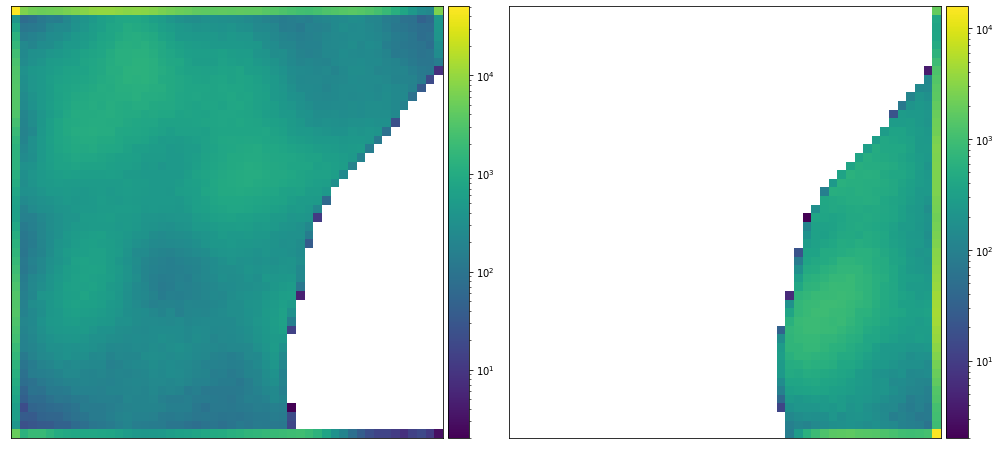

In [ ]:
Hitmap(som_tu, cut_mag_sup, hit_count=False, colorbars=True, compare=activ_inf, normed_compare=True)

<center>

Figure 17 : Hitmap, à gauche activation du réseau entrainé sur True Universe par True universe avec seulement des magnitudes très fortes, \
 à droite activation du réseau entrainé sur True Universe par True universe en excluant les magnitudes très fortes.
</center>


Comme nous pouvons le voir sur le graphique de gauche de la figure [17](#fig17), en ne prenant que les très fortes magnitudes, les neurones activés sont totalement opposés à [ceux activés précédemment](#fig16) par le catalogue COSMOS ne comprenant que des magnitudes plus faibles.

A l'inverse, à droite dans la figure [17](#fig17), en ne prenant que les magnitudes identiques à celles comprisent dans COSMOS, nous obtenons un résultat exactement similaire à celui de la figure [16](#fig16) avec le catalogue COSMOS.

Nous avons donc prouvé ici que les SOMs permettent de détecter des anomalies dans des jeux de données comme des manques dans certains paramètres. Ici la limite dans la magnitude était visible directement à l'aide d'un histogramme mais d'autres problèmes peuvent être plus difficile à trouver et les SOMs semblent être une bonne solution. <font color='red'> Des anomalies ?</font>

<a name="S4_4_2"></a>

<ins>
<h3> 
Avec tous les paramètres
</h3>
</ins>


Nous avons confirmé précédemment la relation entre la magnitude et le rayon effectif qui semblait logique. En ajoutant les deux autres paramètres que sont le sersic et l'ellipticité nous espérons faire ressortir de nouvelles corrélations. Bien que les distributions ne soient pas uniformisées, des résultats sont attendus au moins pour la relation magnitude - rayon effectif.

<a name="fig18"></a>

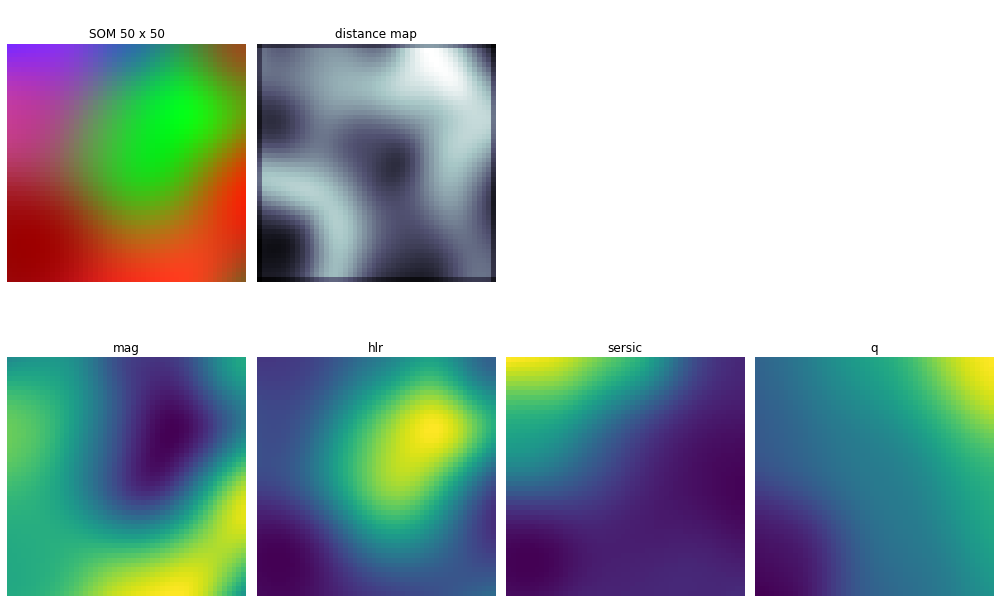

In [ ]:
choice_tu = np.array([*data_tu_fuse.values()]).T
choice_cs = np.array([*data_cs.values()]).T

sigma = 16
learning_rate = 2

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, size=(50,50))
PlotSOMs(som_tu, [*data_tu_fuse], rescale_weigths=True)

<center>

Figure 18 : SOM entrainé avec True Universe, comprenant la magnitude, le rayon effectif, le sersic et l'ellipticité.
</center>

Bien que l'analyse complète des cartes soit plus beaucoup plus complexe, nous retrouvons clairement la relation magnitude - rayon effectif. \
Au cours des multiples visualisations, nous avons aussi remarqué des corrélations plus ou moins marquées entre la magnitude et le sersic. 
En effet, la corrélation est plus complexe mais les galaxies avec une faible magnitude (donc une forte luminosité) corrèlent souvent avec les galaxies à grand sersic, principalement des galaxies dites *early type*, donc elliptiques. \
Nous avons aussi remarqué des corrélations entre le rayon effectif et l'ellipticité ($1-q$) : les zones de forte ellipticité (donc faible q) sont toujours présentes dans des zones de faible rayon effectif.


Il y a donc beaucoup d'effets présents dans ces cartes avec les quatre paramètres mais la relation magnitude - rayon effectif est celle qui domine largement, nous la retrouvons dans la hitmap suivante :

<a name="fig19"></a>

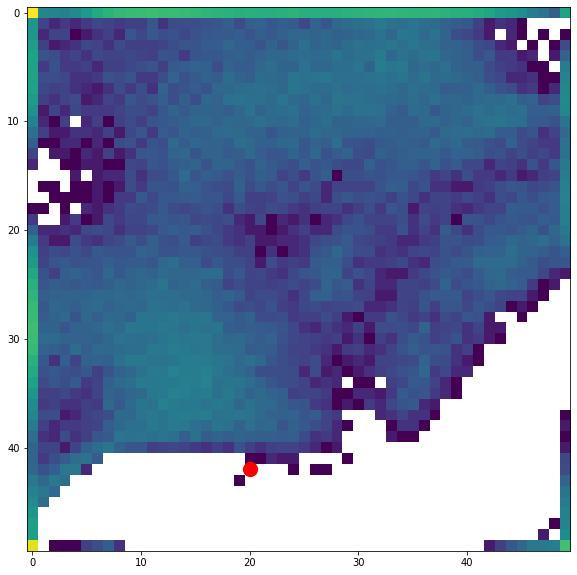

In [ ]:
point = get_loc(som_tu, choice_cs, voisins_nb=8, activ_2_val=0)
act_show(som_tu, point, choice_cs, figsize=(10,10), markersize=200)

<center>

Figure 19 : Hitmap, activation du réseau entrainé sur True Universe par COSMOS, le pixel activé par la galaxie est représenté par le point rouge proche de la zone de dépeuplement de droite. 
</center>

Nous retrouvons sur cette hitmap le dépeuplement des zones à fortes magnitudes.

Nous avons pris une galaxie au hasard proche d'une zone dépeuplée (dont l'activation sur la [hitmap](#fig19) correspond au point rouge) pour identifier ses paramètres et vérifier qu'ils concordent avec ce que nous avons dit précédemment.

Regardons les paramètres de cette galaxie :

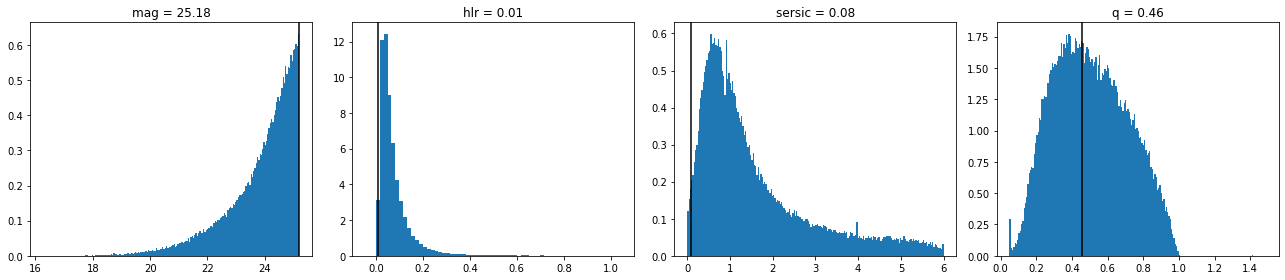

In [ ]:
idx = get_idx(som_tu, choice_cs, point)[0]
check_hist_pos(choice_cs[idx], data_cs_)

<center>

Figure 20 : Paramètres de la galaxies (traits noirs verticaux) sur les distributions de ces paramètres tirées du catalogue COSMOS.
</center>

Nous constatons bien que la magnitude de cette galaxie est à la limite des magnitudes possibles pour COSMOS. Cette galaxies possède aussi un très faible rayon effectif ainsi qu'un très faible sersic.

Tous ces arguments semblent confirmer les corrélations précédemment établies entre la magnitude, le rayon effectif, l'indice de sersic et l'ellipticité. \
Mais l'étude de ces catalogues avec l'outil qu'est le SOM n'en est qu'à ses balbutiement. Il est donc encore trop tôt pour affirmer à 100% que ces corrélations ne sont pas que le biais de l'instrumentation de COSMOS. <font color='red'> Je ne conprends pas cette phrase </font>

Les résultats sont tout de même prometteurs et les zones dépeuplées ne sont pas forcément aux magnitudes fortes donc des choses restent à découvrir.


Nous n'avons pas eu le temps d'uniformiser les distributions des catalogues mais nous avons pensé et survolé plusieurs champs différents pour supprimer les effets de bords. Nous citerons ici les [Growing Self Organising Maps](https://github.com/enry12/growing_hierarchical_som) qui sont des cartes dont la taille grandit au fur et à mesure des itérations en fonction des besoins, ainsi que les SOMs dont la carte est un [tore](https://fr.wikipedia.org/wiki/Tore), supprimant tout simplement les bords en les connectant. <font color='red'> Ca met le dans l ouverture, qui sera grande mais tant mieux. </font>

<a name="S5"></a>

<ins>
<h1> 
Conclusion
</h1>
</ins>


<font color='red'>Bien mettre en valeur le travail de prise en main, d exploration, de maitrise vraiement precise de la technique de som grace au travail sur le jeu de couleur. Faudra noteemment voir si on ne rajoute pas une partie sur les problemes rencontres (effets de bords, normalisation des donnes, equilibrage des echantillons, etc).
    
Expliquer que la technique est vraiment prometteuse, à la fois pour notre objectif (flag de qualite avec le VAE), mais aussi de façon plus générale pour étudier les supports de catalogues.

T as vraiement fait du bon boulot, mais il faut faire comprendre au jury que c est le cas, faut pas qu il pense que t as majoritairement joue sur des couleurs et que cest pas de l astro, pas interessant etc. Faut mettre l accent sur le fait que le stage etait axee sur la decouverte d un nouvel outil, et que tu as reussi et que tu montres que ca a l air d etre vraiement exploitable pour la recherche. pour un stage de m1 c est deja vraiemnt trss bien !</font>

effets de bords corrélés avec hyperparams

pas corrigé ces effets de bords mais...

Cet outil permettra donc de déceler des potentiels manques dans le jeu de données d'entrainement qui servira à analyser les galaxies trouvées par le téléscope spatial 

<font color='red'>Remarques Globales : 
- developper plus les ideees theoriques, les concepts, mais aussi le choix des parametres, etc
- parler des utilisation des SOMs en astro, cite papier photoZ SOM (ce papier ainsi que tt le monde dit, et c'est évident, som avec grosses coupures etc pas bon, hors mes maps astro assez smooth etc
</font>

## Suite à donner : 

faire disparaitre les effets de bords à l'aide de :
- uniformisation des dataset d'entrainement
- GSOM
- tore map
- autre...


mettre une résolution sur les pixels des SOMs entrainés en regardant les voisin, genre si les voisins ont des propriétés identiques résolution bonne, et si un pixel regroupe des prop bcp trop large alors résolution mauvaise 
-> permet de noter sur un autre critère les cartes à l'aide des paramètres astro et nous dis quels pixels sont utilisables ou pas


faire une visualisation directe de galaxies dans hitmap genre clic sur pixel et galaxies ainsi que props pour chaque catalog apparait, pour cosmos l'image de la galaxie est affichée et pour TU la galaxie est émulée en fonction des params


[haut de page](#top)

<a name="ref"></a>

<ins>
<h1> 
Références
</h1>
</ins>


<font color='green'> mettre des numéros et links dans le texte avec les refs</font>


1. European Space Agency, [Mission Euclid](https://www.esa.int/Space_in_Member_States/France/Euclid_une_mission_destinee_a_percer_les_mysteres_de_l_energie_noire_et_de_la_matiere_noire)


2. Catalogue [COSMOS](http://cosmos.astro.caltech.edu) 

3. T. Kohonen, [Self-organized formation of topologically correct feature maps](http://www.cnbc.cmu.edu/~tai/nc19journalclubs/Kohonen1982_Article_Self-organizedFormationOfTopol.pdf), Biol. Cybern. vol. 34, pp. 59-69, 1982

num. Gregory T. Breard, Thèse : [Evaluating Self-Organizing Map Quality Measures as Convergence Criteria](https://digitalcommons.uri.edu/cgi/viewcontent.cgi?article=2013&context=theses), 2017, Université de Rhode Island.


num. Sersic J. L., Boletín de la Asociación Argentina de Astronomía, Vol. 6, pp. 41-43,  [Influence of the atmospheric and instrumental dispersion on the brightness distribution in a galaxy](https://ui.adsabs.harvard.edu/abs/1963BAAA....6...41S/abstract), 1963


num. Bibliothèque [Minisom](https://github.com/JustGlowing/minisom) sur Github


<a name="S6"></a>

<ins>
<h1> 
Annexe
</h1>
</ins>

Pour toute information sur une définition, exécuter `help(nom_de_la_definition)`.

***

***

***

<a name='interactive_cell'></a>

<center> 

Cellule interactive 1

Executer la cellule puis choisir ses paramètres

</center>

In [ ]:
interactive_plot(dat_color_norm(), size=(30,30))


*** 

***

***


<center> 

Cellule interactive 2

Executer pour voir un entrainement itération par itération

</center>

In [ ]:
dict_vars = train_and_get_error(dat_color_norm(), 
                                sigma=8, learning_rate=.2, 
                                iterations=300, frequence=5)

***

***

***


<center> 

Cellules interactives 3

Choisir les paramètres voulu pour l'entrainement et la visualisation des catalogues

(les catalogues doivent être chargés pour exécuter)
</center>

In [ ]:
check_cs, check_tu, vars_select = check_vars(data_cs, data_tu_fuse)

In [ ]:
choice_cs = np.array(check_cs).T
choice_tu = np.array(check_tu).T

In [ ]:
sigma = 25
learning_rate = 1
topo = 'rectangular'
#topo = 'hexagonal'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(som_tu, vars_select, topology=topo, rescale_weigths=True)

In [ ]:
Hitmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

***

***

***

<a name="A_1"></a>

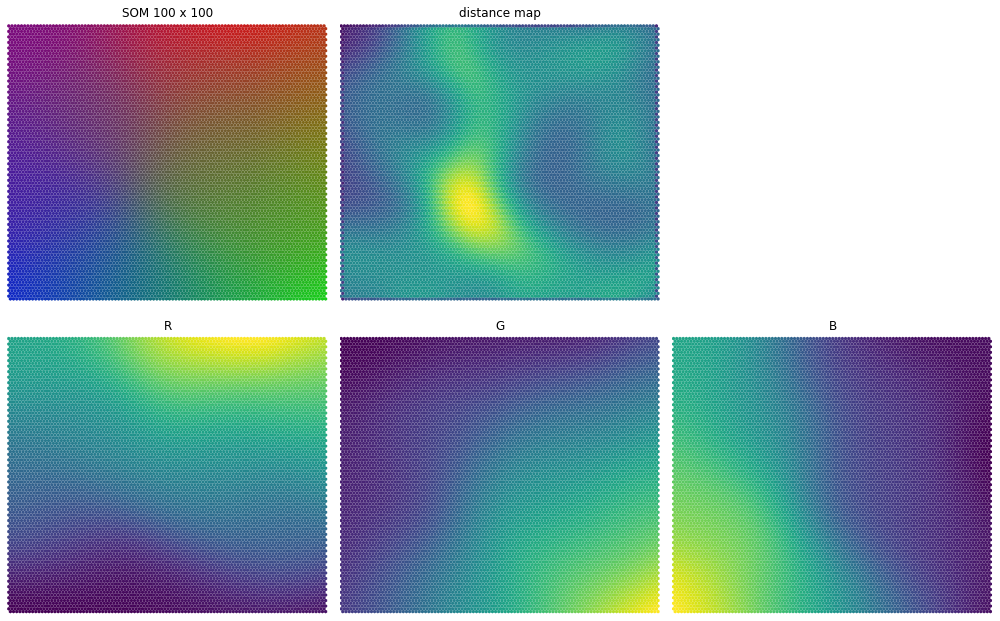

In [ ]:
sigma = 25
learning_rate = 1

som, weights = train_som(data_color, sigma, learning_rate, 1000, size=(100,100), topology="hexagonal")
PlotSOMs(som, topology="hexagonal")

<center>

Figure A_1 : En haut à gauche SOM topologie hexagonale, en haut au milieu  distance map, en bas les poids de chaque couleur.
</center>

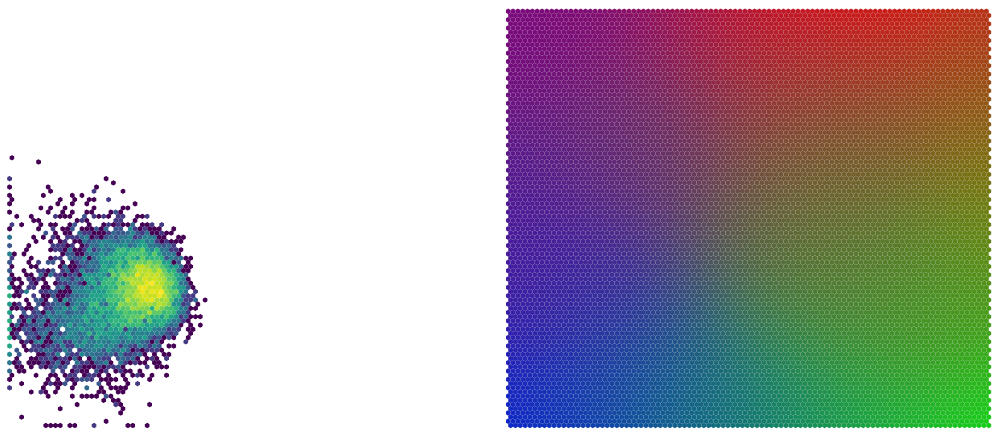

In [ ]:
Hitmap(som, data_blue, compare=weights, hit_count=False, topology="hexagonal")

<center>

Figure A_2 : Heatmap (gauche), activation de la carte hexagonale en réponse à un jeu de données bleu. À droite on a remit la carte à l'issue de l'entrainement.
</center>


[haut de page](#top)